In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [18]:
filePath = '../Data/heart.csv'

data = pd.read_csv(filePath)

data.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [6]:
print("(Rows, columns): " + str(data.shape))
data.columns 

(Rows, columns): (918, 12)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [19]:
#Unique values for each variable
data.nunique(axis=0)

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [20]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [23]:
#Min values of RestingBP and Cholesterol are 0, wich is not relistic, so its a good idea to replace them. 
#In this case the mean is going to be used to replace these values
avg_RestingBP=data[data['RestingBP']!=0]['RestingBP'].astype('float').mean(axis=0)
data["RestingBP"].replace(0, avg_RestingBP, inplace=True)
avg_Cholesterol=data[data['Cholesterol']!=0]['Cholesterol'].astype('float').mean(axis=0)
data["Cholesterol"].replace(0, avg_Cholesterol, inplace=True)
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [24]:
#Check for missing values
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [25]:
#Check if there's a good proportion between the outputs
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [26]:
#Defining custom labes for the dataset after applying one hot encoding
labels_proc = ['Sex_F', 'Sex_M',
       'ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N','ExerciseAngina_Y', 
       'ST_Slope_Down','ST_Slope_Flat', 'ST_Slope_Up',
       'Age', 'RestingBP', 'Cholesterol',
       'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease']
labels_proc

['Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [27]:
#Preprocesing data with One Hot Encoder for training the models. This dataset includes the output class
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer(
    (OneHotEncoder(), ["Sex", "ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]),
    remainder='passthrough')
transformerOHE = transformer.fit(data)
transformed = transformerOHE.transform(data)
data_proc = pd.DataFrame(transformed, columns=labels_proc)
data_proc

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,45.0,110.0,264.0,0.0,132.0,1.2,1.0
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,68.0,144.0,193.0,1.0,141.0,3.4,1.0
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,57.0,130.0,131.0,0.0,115.0,1.2,1.0
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,57.0,130.0,236.0,0.0,174.0,0.0,1.0


In [28]:
#Preprocesing data with One Hot Encoder predicting. This dataset does not include the output class.
#This encoder will be saved later to be used in the app to encode the incoming data
labels_proc_pred = ['Sex_F', 'Sex_M',
       'ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N','ExerciseAngina_Y', 
       'ST_Slope_Down','ST_Slope_Flat', 'ST_Slope_Up',
       'Age', 'RestingBP', 'Cholesterol',
       'FastingBS', 'MaxHR', 'Oldpeak']
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
pred_data = data.copy().drop(columns=["HeartDisease"])
#pred_data.drop(columns=["HeartDisease"])
transformer_pred = make_column_transformer(
    (OneHotEncoder(), ["Sex", "ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]),
    remainder='passthrough')
transformerOHE_pred = transformer_pred.fit(pred_data)
transformed_pred = transformerOHE_pred.transform(pred_data)
data_proc_pred = pd.DataFrame(transformed_pred, columns=labels_proc_pred)
data_proc_pred

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,45.0,110.0,264.0,0.0,132.0,1.2
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,68.0,144.0,193.0,1.0,141.0,3.4
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,57.0,130.0,131.0,0.0,115.0,1.2
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,57.0,130.0,236.0,0.0,174.0,0.0


In [29]:
#assigning data and outputs to X, Y
X = data_proc.iloc[:, :-1].values
y = data_proc.iloc[:, -1].values

In [30]:
#Splitting data between training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

In [31]:
#Normalize splitted data to be used to train models without Cross Validation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-0.52162923,  0.52162923,  0.92894788, ..., -0.54691411,
        -0.68458394,  1.58632168],
       [ 1.91707048, -1.91707048, -1.07648666, ..., -0.54691411,
         0.06965904, -0.81105954],
       [ 1.91707048, -1.91707048,  0.92894788, ..., -0.54691411,
        -0.92276594,  0.14789295],
       ...,
       [-0.52162923,  0.52162923,  0.92894788, ..., -0.54691411,
         0.26814403,  3.02475041],
       [-0.52162923,  0.52162923, -1.07648666, ..., -0.54691411,
         0.90329602,  0.14789295],
       [ 1.91707048, -1.91707048, -1.07648666, ..., -0.54691411,
         0.18875004, -0.81105954]])

In [32]:
#Normalize all the data to use it to train models with Cross Validation
#This scaler will also be saved later to scale incoming data in the app
from sklearn.preprocessing import StandardScaler
sc_all = StandardScaler()
scaler_all = sc_all.fit(X)
X_all = scaler.transform(X)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression

In [17]:
#Performing GridSearch and Cross-Validation with a LogisticRegression to get the best hyper-parameters
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)#Dictionary containing the diferent parameters to test
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.864214 using {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
0.863485 (0.036098) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863485 (0.036098) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.863485 (0.036098) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.863485 (0.036098) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.863485 (0.036098) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.863485 (0.036098) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863485 (0.036098) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.863485 (0.036098) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.863485 (0.036098) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.863485 (0.036098) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.863123 (0.036415) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863123 (0.036415) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.863485 (0.036639) with: {'C': 1.0, 'penalty': 

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        74
         1.0       0.92      0.94      0.93       110

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



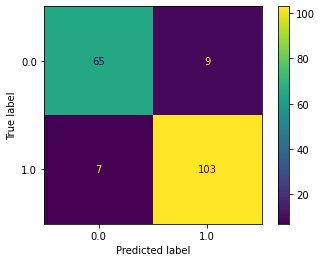

In [44]:
#Creating the LogisticRegression model with the previously obtained parameters and the splitted data
from sklearn.linear_model import LogisticRegression
l_reg = LogisticRegression(C = 0.01, penalty='l2',solver ='sag',warm_start=True) # get instance of model
l_reg.fit(x_train, y_train) # Train/Fit model 

y_pred1 = l_reg.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred1)) # output accuracy
cm_l_reg = confusion_matrix(y_test, y_pred1, labels=l_reg.classes_)
disp_l_reg = ConfusionMatrixDisplay(confusion_matrix=cm_l_reg,display_labels=l_reg.classes_)
disp_l_reg.plot()
plt.show()

In [45]:
#Making a prediction using the model, the scaler and the ecoder
non_proc_labels = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
testData = np.array([[49,'F','NAP',160,180,0,'Normal',156,'N',1.0,'Flat']])
test_pd = pd.DataFrame(testData,columns=non_proc_labels)
transformed_test = transformerOHE_pred.transform(test_pd)
sc_transformed_test = scaler.transform(transformed_test)
sc_transformed_test

array([[ 1.91707048, -1.91707048, -1.07648666, -0.47042304,  1.83549656,
        -0.23688628, -0.51104636,  0.82673227, -0.49829642,  0.80817891,
        -0.80817891, -0.23688628,  0.98378271, -0.88405509, -0.47176562,
         1.54576177, -1.17726019, -0.54691411,  0.74450802,  0.14789295]])

In [49]:
#Prediction
l_reg.predict(sc_transformed_test)[0]

0.0

In [50]:
#Prediction probability
l_reg.predict_proba(sc_transformed_test)[0][1]*100

27.54519379257508

# Ridge Classifer

In [37]:
#Performing GridSearch and Cross-Validation with a RidgeClassifier to get the best hyper-parameters
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
random_state = range(10)
# define grid search
grid = dict(alpha=alpha,solver=solver,random_state=random_state)#Dictionary containing the diferent parameters to test
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.866750 using {'alpha': 0.6, 'random_state': 0, 'solver': 'lsqr'}
0.866388 (0.038039) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'auto'}
0.866388 (0.038039) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'svd'}
0.866388 (0.038039) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'cholesky'}
0.866388 (0.037201) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'lsqr'}
0.866026 (0.037642) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'sparse_cg'}
0.866388 (0.038039) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'sag'}
0.866388 (0.038039) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'saga'}
0.000000 (0.000000) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'lbfgs'}
0.866388 (0.038039) with: {'alpha': 0.1, 'random_state': 1, 'solver': 'auto'}
0.866388 (0.038039) with: {'alpha': 0.1, 'random_state': 1, 'solver': 'svd'}
0.866388 (0.038039) with: {'alpha': 0.1, 'random_state': 1, 'solver': 'cholesky'}
0.866388 (0.037201) with: {'alpha': 0.1, 'random_state': 1

C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3000 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\linear_model\_ridge.py", line 1302, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\linear_model\_ridge.py", line 705, in fit

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        74
         1.0       0.93      0.95      0.94       110

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



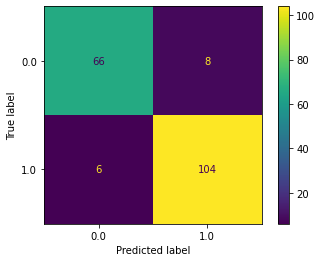

In [51]:
#Creating the LogisticRegression model with the previously obtained parameters and the splitted data
from sklearn.linear_model import RidgeClassifier
ridge_class = RidgeClassifier(alpha= 0.6, random_state= 0, solver= 'lsqr') # get instance of model
ridge_class.fit(x_train, y_train) # Train/Fit model 
#Testing the model with the classification report and confusion matrix
y_pred2 = ridge_class.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy
cm_ridge_class = confusion_matrix(y_test, y_pred2, labels=ridge_class.classes_)
disp_ridge_class = ConfusionMatrixDisplay(confusion_matrix=cm_ridge_class,display_labels=ridge_class.classes_)
disp_ridge_class.plot()
plt.show()

# K-Nearest Neighbors

In [21]:
#Performing GridSearch and Cross-Validation with a KNeighborsClassifier to get the best hyper-parameters
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
n_neighbors = range(1, 25, 2)
weights = ['uniform', 'distance']
algorithm = ['ball_tree','kd_tree','brute','auto']
metric = ['euclidean', 'manhattan', 'minkowski']
leaf_size = range(10, 70, 10)
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,metric=metric,leaf_size=leaf_size)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.876931 using {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}
0.818809 (0.034922) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.818809 (0.034922) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.847141 (0.035459) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.843514 (0.037591) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.855498 (0.034811) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.853321 (0.037088) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.861670 (0.034834) with: {'algorithm': 'ball_tree', 'leaf_size': 10,

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87        74
         1.0       0.90      0.93      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



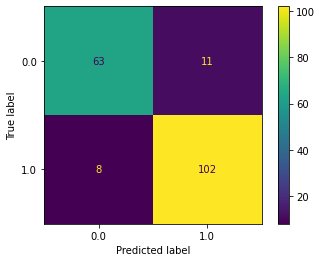

In [52]:
#Creating the KNeighborsClassifier model with the previously obtained parameters and the splitted data
from sklearn.neighbors import KNeighborsClassifier
k_near = KNeighborsClassifier(metric='manhattan', n_neighbors=21, 
                              weights='distance', leaf_size = 10,algorithm='ball_tree') # get instance of model
k_near.fit(x_train, y_train) # Train/Fit model 
y_pred3 = k_near.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred3)) # output accuracy
cm_k_near = confusion_matrix(y_test, y_pred3, labels=k_near.classes_)
disp_k_near = ConfusionMatrixDisplay(confusion_matrix=cm_k_near,display_labels=k_near.classes_)
disp_k_near.plot()
plt.show()

# SVM

In [89]:
#Performing GridSearch and Cross-Validation with a SVC to get the best hyper-parameters
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale','auto']
random_state = range(1,20,2)
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma,random_state=random_state)#Dictionary containing the diferent parameters to test
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.866758 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'random_state': 1}
0.798459 (0.042967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 1}
0.798459 (0.042967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 3}
0.798459 (0.042967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 5}
0.798459 (0.042967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 7}
0.798459 (0.042967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 9}
0.798459 (0.042967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 11}
0.798459 (0.042967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 13}
0.798459 (0.042967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 15}
0.798459 (0.042967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 17}
0.798459 (0.042967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state':

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        74
         1.0       0.92      0.95      0.93       110

    accuracy                           0.92       184
   macro avg       0.92      0.91      0.91       184
weighted avg       0.92      0.92      0.92       184



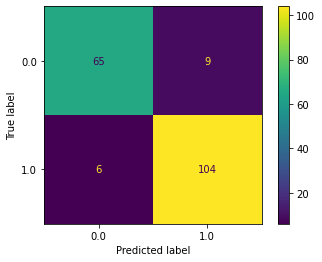

In [54]:
#Creating the SVC model with the previously obtained parameters and the splitted data
from sklearn.svm import SVC
svm = SVC(C=0.1, gamma='scale',kernel= 'sigmoid',random_state=1,probability=True) # get instance of model
svm.fit(x_train, y_train) # Train/Fit model 
y_pred4 = svm.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred4)) # output accuracy
cm_svm = confusion_matrix(y_test, y_pred4, labels=svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,display_labels=svm.classes_)
disp_svm.plot()
plt.show()

# Decision Tree

In [25]:
#Performing GridSearch and Cross-Validation with a DecisionTreeClassifier to get the best hyper-parameters 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = range(2,20,2)
max_features = range(2,20,2)
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855857 using {'criterion': 'gini', 'max_depth': 4, 'max_features': 12, 'splitter': 'best'}
0.742152 (0.057623) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'splitter': 'best'}
0.744056 (0.073985) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'splitter': 'random'}
0.787223 (0.048706) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 4, 'splitter': 'best'}
0.790854 (0.054199) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 4, 'splitter': 'random'}
0.806494 (0.048071) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'splitter': 'best'}
0.799976 (0.048350) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'splitter': 'random'}
0.807947 (0.040986) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 8, 'splitter': 'best'}
0.807565 (0.035856) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 8, 'splitter': 'random'}
0.809388 (0.036883) with: {'criterion': 'gini', 'max_depth': 2, 'max_

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82        74
         1.0       0.89      0.86      0.88       110

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



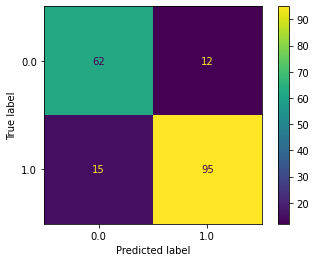

In [55]:
#Creating the DecisionTreeClassifier model with the previously obtained parameters and the splitted data
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_features= 12, splitter='best') # get instance of model
dec_tree.fit(x_train, y_train) # Train/Fit model 
y_pred5 = dec_tree.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred5)) # output accuracy
cm_dec_tree = confusion_matrix(y_test, y_pred5, labels=dec_tree.classes_)
disp_dec_tree = ConfusionMatrixDisplay(confusion_matrix=cm_dec_tree,display_labels=dec_tree.classes_)
disp_dec_tree.plot()
plt.show()

# Multi-Layer Perceptron

In [78]:
#Performing GridSearch and Cross-Validation with a MLPClassifier to get the best hyper-parameters
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
hidden_layer_sizes = np.arange(10, 12)
activation = ['identity', 'logistic', 'tanh','relu']
solver = ['lbfgs','sgd','adam']
learning_rate = ['constant', 'invscaling', 'adaptive']
#alpha = 10.0 ** -np.arange(1, 10)
max_iter = range(200,600,50)
random_state = range(4)
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(activation=activation,hidden_layer_sizes=hidden_layer_sizes,
            solver=solver,max_iter=max_iter,random_state=random_state,
           learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


Best: 0.870035 using {'activation': 'logistic', 'hidden_layer_sizes': 11, 'learning_rate': 'constant', 'max_iter': 350, 'random_state': 0, 'solver': 'sgd'}
0.863848 (0.035993) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 200, 'random_state': 0, 'solver': 'lbfgs'}
0.863489 (0.038518) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 200, 'random_state': 0, 'solver': 'sgd'}
0.863852 (0.035427) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 200, 'random_state': 0, 'solver': 'adam'}
0.863485 (0.036098) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 200, 'random_state': 1, 'solver': 'lbfgs'}
0.860217 (0.038554) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 200, 'random_state': 1, 'solver': 'sgd'}
0.862765 (0.035623) with: {'activa

0.799582 (0.043560) with: {'activation': 'relu', 'hidden_layer_sizes': 11, 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 1, 'solver': 'lbfgs'}
0.863836 (0.038374) with: {'activation': 'relu', 'hidden_layer_sizes': 11, 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 1, 'solver': 'sgd'}
0.862781 (0.034020) with: {'activation': 'relu', 'hidden_layer_sizes': 11, 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 1, 'solver': 'adam'}
0.796652 (0.047156) with: {'activation': 'relu', 'hidden_layer_sizes': 11, 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 2, 'solver': 'lbfgs'}
0.857700 (0.042284) with: {'activation': 'relu', 'hidden_layer_sizes': 11, 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 2, 'solver': 'sgd'}
0.851155 (0.036792) with: {'activation': 'relu', 'hidden_layer_sizes': 11, 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 2, 'solver': 'adam'}
0.799562 (0.040771) with: {'activation': 'relu', 'hi

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        74
         1.0       0.92      0.94      0.93       110

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



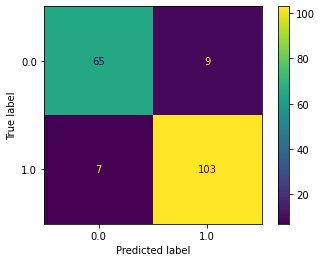

In [56]:
#Creating the MLPClassifier model with the previously obtained parameters and the splitted data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation= 'logistic', hidden_layer_sizes= 11, max_iter= 1000, random_state= 0, solver= 'sgd',
                   learning_rate = 'constant') # get instance of model
mlp.fit(x_train, y_train) # Train/Fit model 
y_pred6 = mlp.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred6)) # output accuracy
cm_mlp = confusion_matrix(y_test, y_pred6, labels=mlp.classes_)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp,display_labels=mlp.classes_)
disp_mlp.plot()
plt.show()

In [57]:
#Getting all the parameters of the mlp model
mlp.get_params()

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 11,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [58]:
#Re-training mlp
mlp.partial_fit([x_train[0]] ,[y_train[0]])

MLPClassifier(activation='logistic', hidden_layer_sizes=11, max_iter=1000,
              random_state=0, solver='sgd')

# Bagged Decision Trees (Bagging)

In [42]:
#Performing GridSearch and Cross-Validation with a BaggingClassifier to get the best hyper-parameters
from sklearn.ensemble import BaggingClassifier
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)#Dictionary containing the diferent parameters to test
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.858405 using {'n_estimators': 100}
0.838772 (0.041064) with: {'n_estimators': 10}
0.858405 (0.034818) with: {'n_estimators': 100}
0.858051 (0.035364) with: {'n_estimators': 1000}


              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        74
         1.0       0.88      0.84      0.86       110

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



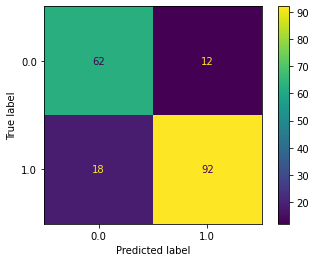

In [60]:
#Creating the BaggingClassifier model with the previously obtained parameters and the splitted data
from sklearn.ensemble import BaggingClassifier
bd_tree = BaggingClassifier(n_estimators=100) # get instance of model
bd_tree.fit(x_train, y_train) # Train/Fit model 
y_pred6 = bd_tree.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred6)) # output accuracy
cm_bd_tree = confusion_matrix(y_test, y_pred6, labels=bd_tree.classes_)
disp_bd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_bd_tree,display_labels=bd_tree.classes_)
disp_bd_tree.plot()
plt.show()

# Random Forest

In [100]:
#Performing GridSearch and Cross-Validation with a RandomForestClassifier to get the best hyper-parameters
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
criterion = ['gini','entropy','log_loss']
class_weight = ['balanced','balanced_subsample']
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(n_estimators=n_estimators,max_features=max_features,criterion=criterion,class_weight=class_weight)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):

Best: 0.875840 using {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}
0.860917 (0.036738) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.872922 (0.031773) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.872563 (0.034824) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}
0.855506 (0.041919) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}
0.867475 (0.033672) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
0.871843 (0.034625) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.847492 (0.038545) with: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}
0.874029 (0.034961) w

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        74
         1.0       0.91      0.91      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



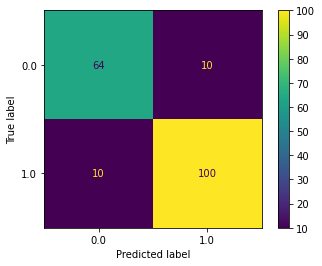

In [61]:
#Creating the RandomForestClassifier model with the previously obtained parameters and the splitted data
from sklearn.ensemble import RandomForestClassifier
rd_forest = RandomForestClassifier(max_features= 'sqrt', n_estimators= 1000,class_weight='balanced_subsample',
                                  criterion='gini',) # get instance of model
rd_forest.fit(x_train, y_train) # Train/Fit model 
y_pred7 = rd_forest.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred7)) # output accuracy
cm_rd_forest = confusion_matrix(y_test, y_pred7, labels=rd_forest.classes_)
disp_rd_forest = ConfusionMatrixDisplay(confusion_matrix=cm_rd_forest,display_labels=rd_forest.classes_)
disp_rd_forest.plot()
plt.show()

# Stochastic Gradient Boosting

In [47]:
#Performing GridSearch and Cross-Validation with a GradientBoostingClassifier to get the best hyper-parameters
from sklearn.ensemble import GradientBoostingClassifier
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.874745 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.862394 (0.034750) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.859130 (0.036229) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.863852 (0.037607) with: {'learning_rate': 0.001, 'ma

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85        74
         1.0       0.90      0.89      0.89       110

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



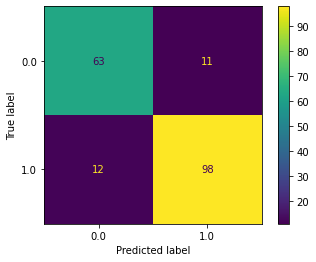

In [62]:
#Creating the GradientBoostingClassifier model with the previously obtained parameters and the splitted data
from sklearn.metrics import classification_report 
from sklearn.ensemble import GradientBoostingClassifier
sgb = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 100, subsample= 0.7) # get instance of model
sgb.fit(x_train, y_train) # Train/Fit model 
y_pred8 = sgb.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred8)) # output accuracy
cm_sgb = confusion_matrix(y_test, y_pred8, labels=sgb.classes_)
disp_sgb = ConfusionMatrixDisplay(confusion_matrix=cm_sgb,display_labels=sgb.classes_)
disp_sgb.plot()
plt.show()

# XGBoost Classifier

In [87]:
#Performing GridSearch and Cross-Validation with a XGBClassifier to get the best hyper-parameters
import xgboost as xgb
# define models and parameters
model = xgb.XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
max_depth = range (2, 10, 1)
n_estimators = range(60, 220, 40)
learning_rate = [0.1, 0.01, 0.05]
gamma = np.arange(0.5, 10.5, 1)
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[19:12:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.877656 using {'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.869657 (0.036518) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}
0.869287 (0.039723) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.869294 (0.041616) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140}
0.866026 (0.042224) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180}
0.874383 (0.038318) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}
0.870756 (0.038330) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.869669 (0.039829) with: {'gamma': 0.5, 'learning_rat

C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        74
         1.0       0.92      0.95      0.94       110

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



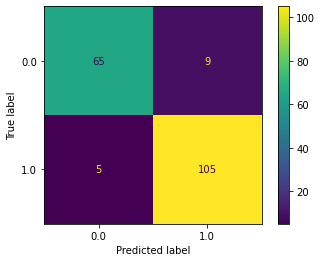

In [63]:
#Creating the XGBClassifier model with the previously obtained parameters and the splitted data
import xgboost as xgb
xgb_class = xgb.XGBClassifier(objective ='binary:logistic',eval_metric='auc', learning_rate = 0.05,
                max_depth = 3, alpha = 10, n_estimators = 100,use_label_encoder=False,importance_type='weight',
                gamma=0.5,num_class=1)
xgb_class.fit(x_train,y_train)
y_pred9 = xgb_class.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred9)) # output accuracy
cm_xgb_class = confusion_matrix(y_test, y_pred9, labels=xgb_class.classes_)
disp_xgb_class = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_class,display_labels=xgb_class.classes_)
disp_xgb_class.plot()
plt.show()

In [18]:
#Getting all the parameters of the XGBClassifier model
xgb_class.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0.5,
 'gpu_id': -1,
 'importance_type': 'weight',
 'interaction_constraints': '',
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 10,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'auc',
 'alpha': 10,
 'num_class': 1}

In [64]:
#Re-training XGB Classifier test
xgb_class_trained = xgb.XGBClassifier()
booster = xgb_class.get_booster()
xgb_class.fit(x_test[:10],y_test[:10],xgb_model = booster)#re-training needs at least 1 of each class
y_pred9 = xgb_class.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred9)) # output accuracy

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        74
         1.0       0.92      0.95      0.94       110

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



In [18]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred9))
print("RMSE: %f" % (rmse))

RMSE: 0.265805


### Creating XGB Booster in a different way 
In this way we can also plot the decision tree and get the Feature Importance

In [68]:
#Putting data in DMatrix
feature_names = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
data_dmatrix = xgb.DMatrix(data=X,label=y,feature_names=labels_proc_pred)

In [69]:
#Cross Validation
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [70]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.483269,0.000737,0.484522,0.000477
1,0.466589,0.002658,0.468952,0.003640
2,0.458085,0.005878,0.461317,0.005475
3,0.443736,0.005577,0.447242,0.004790
4,0.432304,0.003661,0.436078,0.003174


In [71]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.329266
Name: test-rmse-mean, dtype: float64


In [72]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[17:24:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


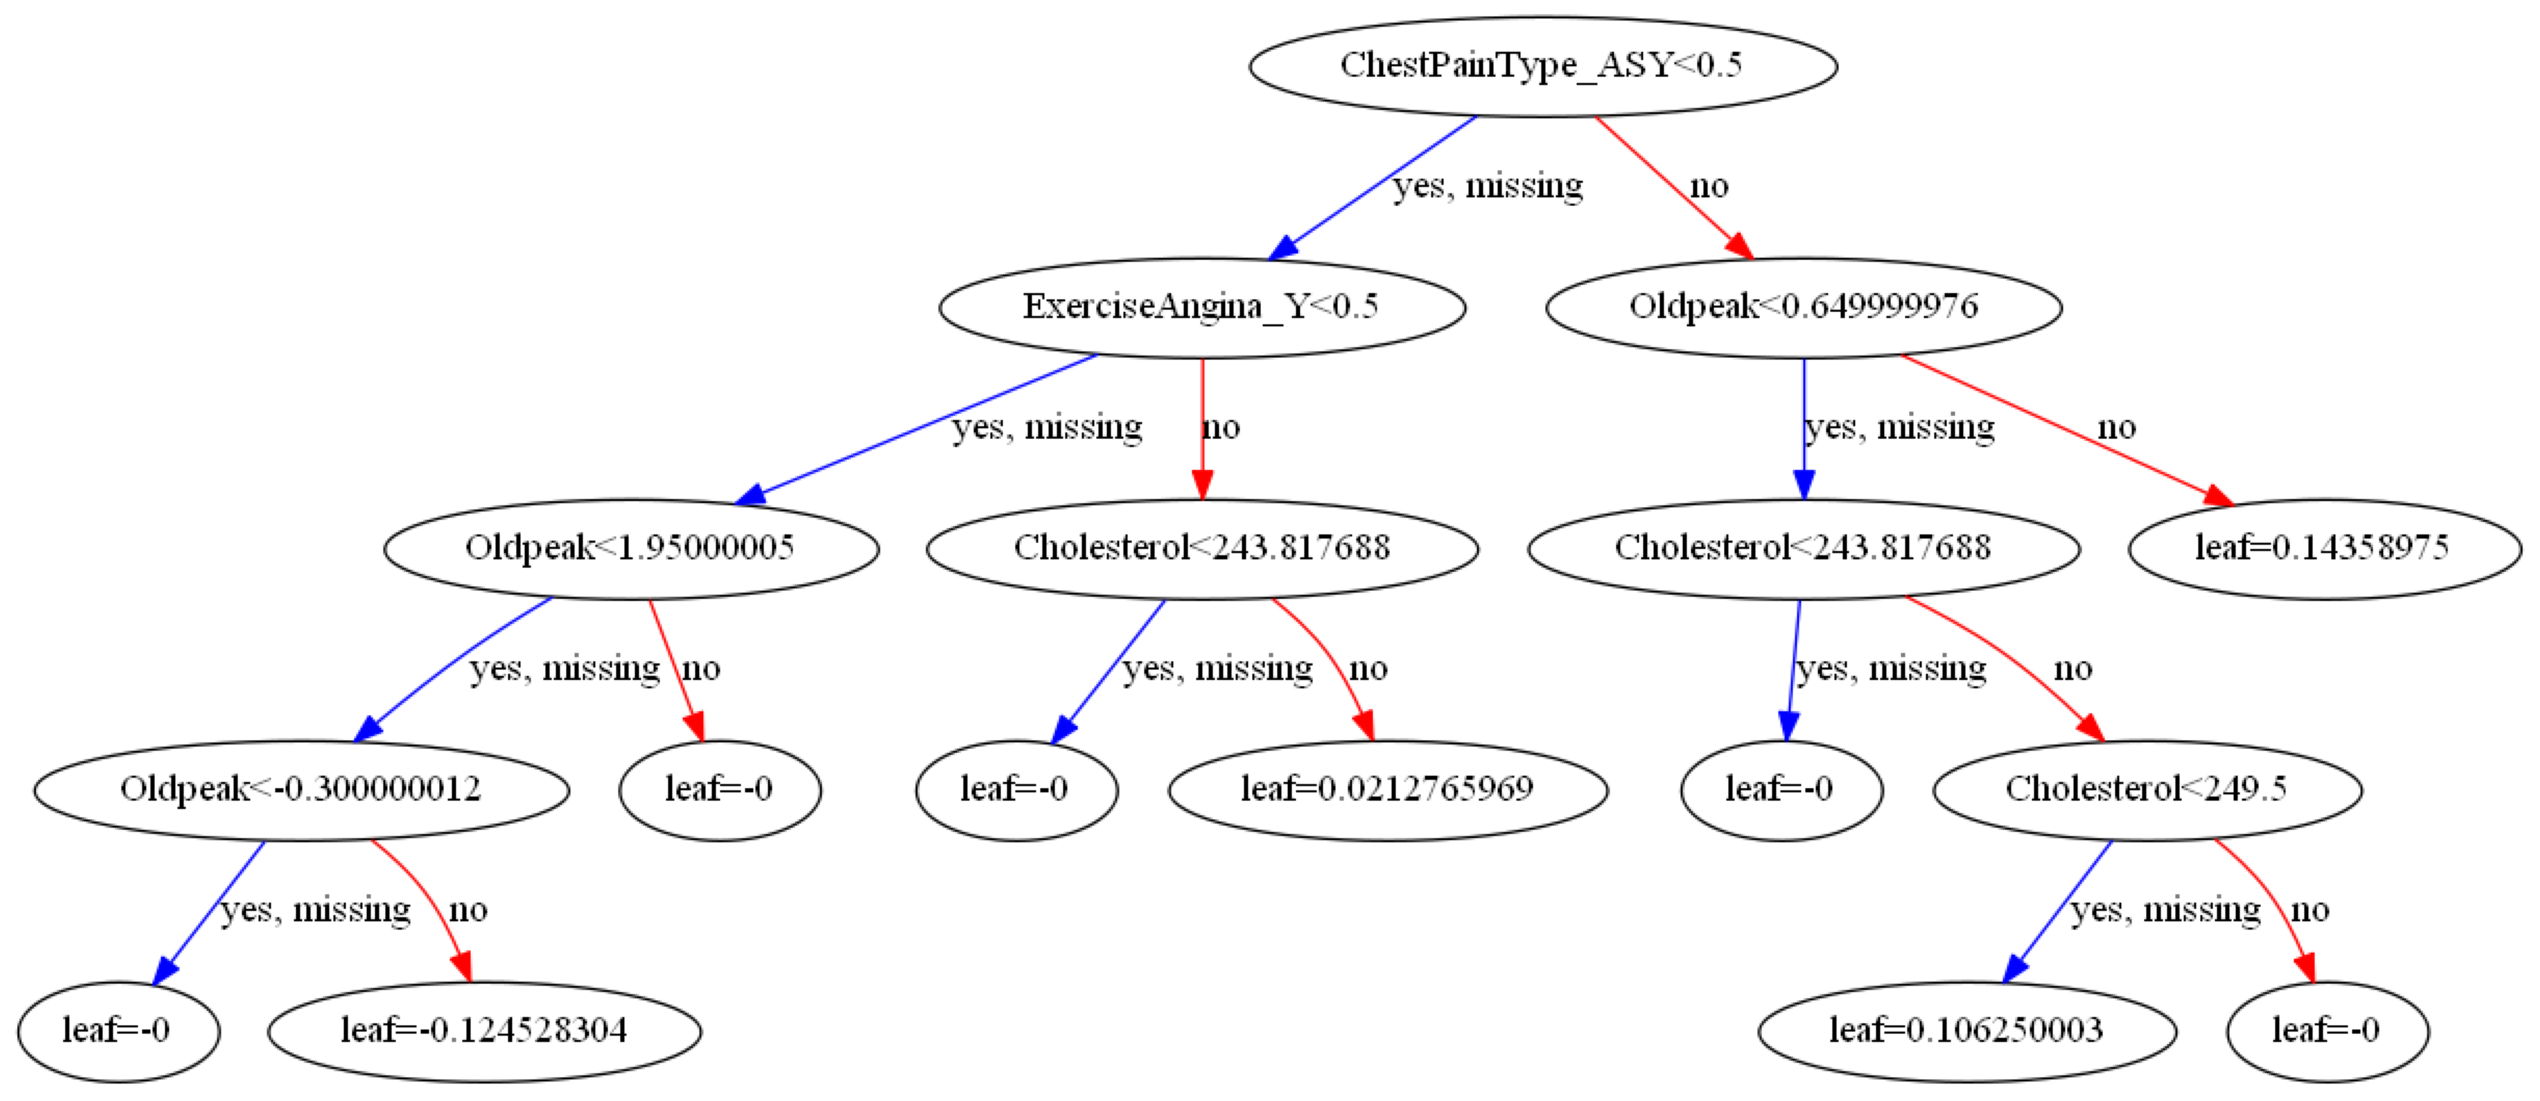

In [74]:
#Visualize Boosting Tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 20]
plt.show()

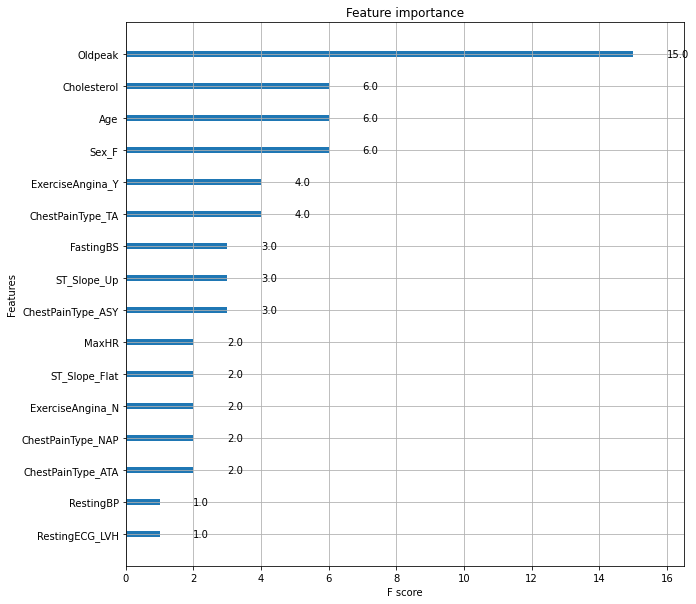

In [76]:
#Visualize Feature Importance
xgb.plot_importance(xg_reg,ylabel='Features' )
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

#  Soft and Hard Voting in Ensemble Models

In [77]:
#Here we are defining a dictionary with the best models in order to construct the voting classiffiers
classifiers = dict()
classifiers["XG Boost"] = xgb_class
classifiers["K-Nearest Neighbors"] = k_near
classifiers['Stochastic Gradient Boosting'] = sgb
classifiers['Random Forest'] = rd_forest
classifiers['Multi-Layer Perceptron'] = mlp
estimators = list(classifiers.items())

In [78]:
estimators

[('XG Boost',
  XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                eval_metric='auc', gamma=0.5, gpu_id=-1, importance_type='weight',
                interaction_constraints='', learning_rate=0.05, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_class=1, num_parallel_tree=1, predictor='auto',
                random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
                subsample=1, tree_method='exact', use_label_encoder=False, ...)),
 ('K-Nearest Neighbors',
  KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                       n_neighbors=21, weights='distance')),
 ('Stochastic Gradient Boosting',
  GradientBoostingClassifier(learning_rate=0.01, subsample=0.7)),
 ('Random Forest',
  RandomFo

In [79]:
#Creating the Voting Classifiers with the previously defined estimators
from sklearn.ensemble import VotingClassifier
vc_sv = VotingClassifier(estimators=estimators, voting="soft")
vc_hv = VotingClassifier(estimators=estimators, voting="hard")

In [80]:
vc_sv.get_params()

{'estimators': [('XG Boost',
   XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                 eval_metric='auc', gamma=0.5, gpu_id=-1, importance_type='weight',
                 interaction_constraints='', learning_rate=0.05, max_delta_step=0,
                 max_depth=3, min_child_weight=1, missing=nan,
                 monotone_constraints='()', n_estimators=100, n_jobs=8,
                 num_class=1, num_parallel_tree=1, predictor='auto',
                 random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
                 subsample=1, tree_method='exact', use_label_encoder=False, ...)),
  ('K-Nearest Neighbors',
   KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                        n_neighbors=21, weights='distance')),
  ('Stochastic Gradient Boosting',
   GradientBoostingClassifier(learning_rate=0.01, subsample=0.7)),


              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        74
         1.0       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



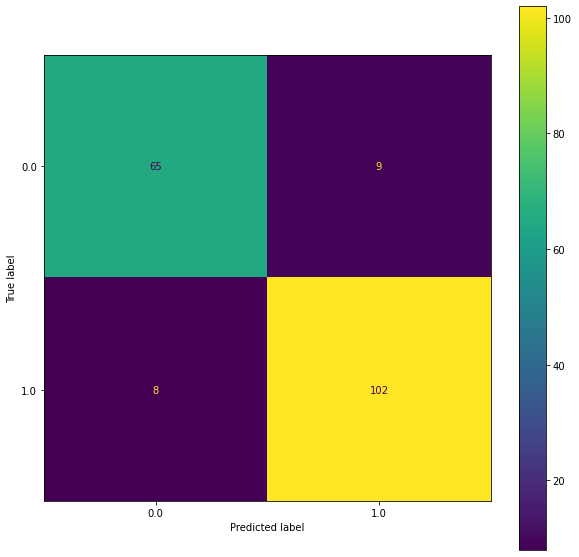

In [84]:
#Creating the SoftVotingClassifier model with the splitted data
vc_sv.fit(x_train, y_train) # Train/Fit model 
vc_sv_pred = vc_sv.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, vc_sv_pred)) # output accuracy
cm_vc_sv = confusion_matrix(y_test, vc_sv_pred, labels=vc_sv.classes_)
disp_vc_sv = ConfusionMatrixDisplay(confusion_matrix=cm_vc_sv,display_labels=vc_sv.classes_)
disp_vc_sv.plot()
plt.show()

In [82]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [83]:
# Performing Cross Validation for Soft Voting Classifier
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
nested_score = cross_val_score(estimator=vc_sv,X=X_all, y=y, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score)

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81        41
         1.0       0.85      0.86      0.85        51

    accuracy                           0.84        92
   macro avg       0.84      0.83      0.83        92
weighted avg       0.84      0.84      0.84        92

              precision    recall  f1-score   support

         0.0       0.82      0.68      0.75        41
         1.0       0.78      0.88      0.83        51

    accuracy                           0.79        92
   macro avg       0.80      0.78      0.79        92
weighted avg       0.80      0.79      0.79        92

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86        41
         1.0       0.87      0.92      0.90        51

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92

              preci

              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        41
         1.0       0.84      0.90      0.87        51

    accuracy                           0.85        92
   macro avg       0.85      0.84      0.84        92
weighted avg       0.85      0.85      0.85        92

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.89        41
         1.0       0.89      0.94      0.91        51

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        41
         1.0       0.92      0.88      0.90        50

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

              preci

In [85]:
#Accurancy of soft voting classifier with CrossValidation
np.mean(nested_score)

0.8736502627806976

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        74
         1.0       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



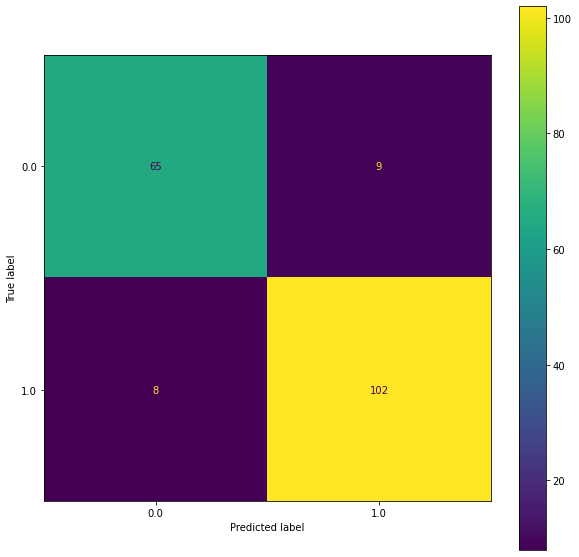

In [86]:
#Creating the HardVotingClassifier model with the splitted data
vc_hv.fit(x_train, y_train) # Train/Fit model 
vc_hv_pred = vc_hv.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, vc_hv_pred)) # output accuracy
cm_vc_hv = confusion_matrix(y_test, vc_hv_pred, labels=vc_hv.classes_)
disp_vc_hv = ConfusionMatrixDisplay(confusion_matrix=cm_vc_hv,display_labels=vc_hv.classes_)
disp_vc_hv.plot()
plt.show()

In [87]:
# Performing Cross Validation for Hard Voting Classifier
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
nested_score = cross_val_score(estimator=vc_hv,X=X_all, y=y, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score)

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81        41
         1.0       0.83      0.88      0.86        51

    accuracy                           0.84        92
   macro avg       0.84      0.83      0.83        92
weighted avg       0.84      0.84      0.84        92

              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73        41
         1.0       0.77      0.84      0.80        51

    accuracy                           0.77        92
   macro avg       0.77      0.76      0.77        92
weighted avg       0.77      0.77      0.77        92

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88        41
         1.0       0.89      0.92      0.90        51

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92

              preci

              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        41
         1.0       0.84      0.90      0.87        51

    accuracy                           0.85        92
   macro avg       0.85      0.84      0.84        92
weighted avg       0.85      0.85      0.85        92

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.89        41
         1.0       0.89      0.94      0.91        51

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        41
         1.0       0.92      0.88      0.90        50

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

              preci

In [88]:
#Accurancy of hard voting classifier with CrossValidation
np.mean(nested_score)

0.8722089504698202

In [90]:
import joblib

### Saving Models, scaler and encoder to be used in the app

In [91]:
#Saving xgb model to get the feature importance
joblib.dump(xgb_class,'AiModels\XGBClassifier.pkl')

['AiModels\\XGBClassifier.pkl']

In [92]:
#Saving OneHotEncoder for predictions (without the output class)
joblib.dump(transformerOHE_pred,'OHE\OHEncoder.pkl')

['OHE\\OHEncoder.pkl']

In [93]:
#Saving Scaler for predictions
joblib.dump(scaler_all,'Scaler\SScaler.pkl')

['Scaler\\SScaler.pkl']

In [94]:
#Saving Soft Voting Classifier
joblib.dump(vc_sv,'AiModels\SVClassifier.pkl')

['AiModels\\SVClassifier.pkl']

In [95]:
#Saving OneHotEncoder for encodig all the original dataset
joblib.dump(transformerOHE,'OHE\OHEncoderOriginal.pkl')

['OHE\\OHEncoderOriginal.pkl']

In [96]:
#Saving mlp model to be used as main model since it is one of the most accurate models and it lets us retrain it with new
#data in an easy way
joblib.dump(mlp,'AiModels\MLPClassifier.pkl')

['AiModels\\MLPClassifier.pkl']